# Exercise 9: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?).

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data.

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [9]:
# WRITE YOUR CODE HERE
#Load tidyverse
#install.packages("tidyverse")
library(tidyverse)
#install.packages("ISLR")
library(ISLR)
library(ggplot2)

#Load the data
system("gdown --id 1wKstP28J9Fnx_PLxs-eVSy7xkXvUNpK4")
list.files()
d_lex <- read.csv("LexicalData_withIncorrect.csv")
#head(d_lex)

system("gdown --id 1m0gm26jgxnI8Jlkkc3RN8UYnxeBOs072")
list.files()
d_items<- read.csv("Items.csv")
#head(d_items)
d_items_2<- d_items%>%
  select(Word, Length, Log_Freq_HAL)%>%
  rename(D_Word = Word)
#head(d_items_2)

d1<-left_join(d_lex, d_items_2, by = "D_Word")%>%
  drop_na()
head(d1)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Items.csv"                     "LexicalData_withIncorrect.csv"
[3] "sample_data"

[1] "Items.csv"                     "LexicalData_withIncorrect.csv"
[3] "sample_data"

,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,8,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

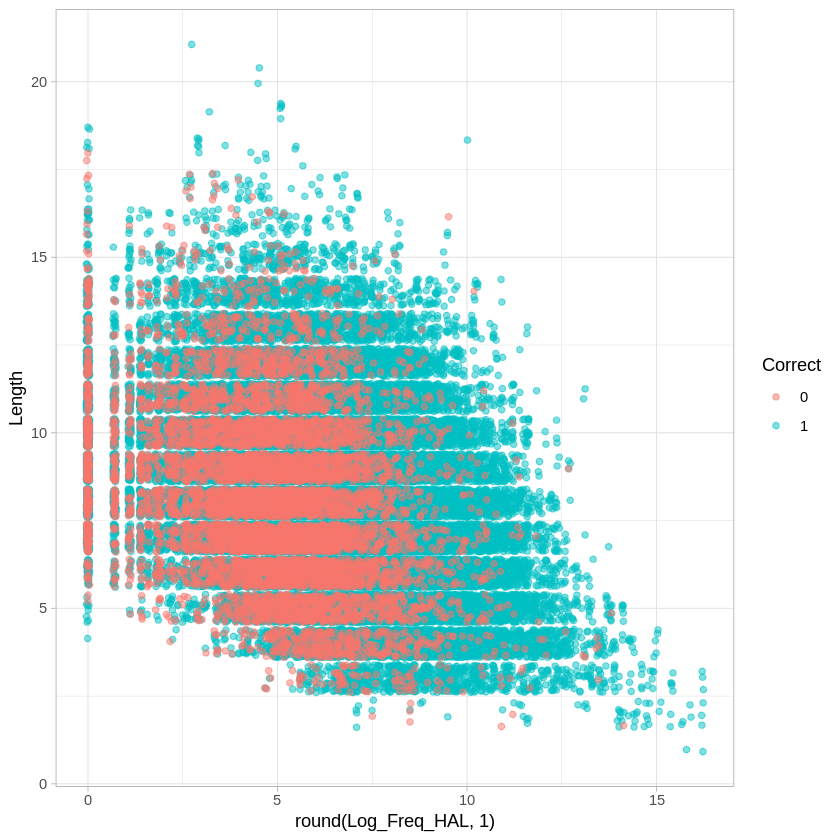

In [8]:
require(tidyverse) # Load the tidyverse package, if you haven't yet
#rename dataset d1 to fdata
fdata<-d1
fdata$Correct <- as.factor(fdata$Correct) # so that R knows that Correct is categorical, not numeric.

# plot the Correct / Incorrect clusters
ggplot(fdata,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light()


What do you observe about the "Correct" and "Incorrect" clusters?

> *Write your reponse here*
> The correct cluster (when Correct = 1) takes up a larger area. The incorrect cluster (when Correct = 0) is more tightly clustered (takes up less area). Also, it seems the two clusters overlap in this 2D space of Length x Log_Freq_HAL.

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [10]:
# WRITE YOUR CODE HERE

# Run the GLM
glm.fit=glm(Correct~Length*Log_Freq_HAL, data=fdata, family=binomial) # logistic regression

# Summarize
summary(glm.fit)


Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = fdata)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

> *Write your response here*
> We can conclude that both variables (Length, Log_Freq_HAL) are significant predictors of Correct and the interaction is significant as well. Further we can say that: 1) for a 1 unit change in Length, the log odds of Correct = 1 changes by 0.15, multiplied by a baseline odds of e^(-0.94), 2) for a 1 unit change in Log_Freq_HAL, the log odds of Correct = 1 changes by 0.39, multiplied by the baseline odds, and 3) for a 1 unit change in the interaction term, the log odds of Correct = 1 changes by -0.01, multiplied by the baseline odds. So, qualitatively, the log odds of Correct increases with Length and Log_Freq_HAL, but decreases in their interaction.

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [14]:
# WRITE YOUR CODE HERE
threshold = 0.50 #binarizing threshold
glm_prob_df = data.frame(predict(glm.fit, type = "response"))
colnames(glm_prob_df) = c('predicted_prob')
num_observations = nrow(glm_prob_df)

# First make a list of "Incorrect" (0)
glm_prob_df$predicted_binary=rep(0,num_observations)

# Then use the probability output to label the Corrects (1) using the threshold of 50% probability.
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]=1 #find the rows that have prob > threshold and predict as 'Correct' (1)

# Now let's look at the prediction accuracy
confusion_df = data.frame(glm_prob_df$predicted_binary, fdata$Correct)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))


         actual
predicted     0     1
        0    13    44
        1  7966 62566

[1] "Accuracy: 0.886526229299183"


Did the model do well at predicting lexical decision correctness? Why or why not?

> *Write your response here*  
> It did ok (better than random guessing?). But it seemed to miscategorize a lot of actual incorrects as being predicted as correct. This is probably because there is a lot of overlap between the two clusteres (and the incorrect cluster looks like it exists in the 2D space inside of the space that the correct cluster occupies), making it more difficult to classify in this limited feature space.

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`.

*Hint: see the Classifiers tutorial.*

In [16]:
# WRITE YOUR CODE HERE
library(MASS)
qda.fit = qda(Correct~Length*Log_Freq_HAL, data=fdata)
qda.fit


Call:
qda(Correct ~ Length * Log_Freq_HAL, data = fdata)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
    Length Log_Freq_HAL Length:Log_Freq_HAL
0 8.047124     4.932123            37.95260
1 7.979971     6.444849            49.34219

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy.

In [19]:
# WRITE YOUR CODE HERE
qda.class=predict(qda.fit, fdata)$class
table(qda.class, fdata$Correct)
print(paste("Accuracy:",mean(qda.class==fdata$Correct)))


         
qda.class     0     1
        0   455  1647
        1  7524 60963

[1] "Accuracy: 0.870078907478502"


How does QDA prediction performance differ from that of logistic regression?

> *Write your response here*
> It performs slightly worse in terms of accuracy compared to logistic regression (0.87 compared to 0.89). It makes a lot more mistakes misclassifying corrects as incorrect. Against this probably has to do with the fact that in the feature space, the clusters overlap. A lot more of the corrects (which live in this overlap) will probably end up being misclassified as incorrect because they are close to the center of the incorrect cluster.

**DUE:** 5pm EST, March 11, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*